In [1]:
import sys
print(f'Interpreter dir: {sys.executable}')
import os

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    
print(f'Working dir: {os.getcwd()}')
%load_ext autoreload
%autoreload 2

Interpreter dir: /Users/jsg/Documents/GitHub/water_hackathlon/.venv_waterhack/bin/python3
Working dir: /Users/jsg/Documents/GitHub/water_hackathlon


In [2]:
import glob
from pathlib import Path
    
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

from waterhack.utils import find_col

# Load smart meter data

- Load smart meter attributes and acord data. Merge them.
- Then load all smart meter datasets
- Filter for extreme values of >100 and <-100
- Filter for the weird bug Louis mentiones
- Aggregated the consumptions by “CATEGORY ID” calculating the sum, mean, min, mas std

---

In [13]:
df_attrib = pd.read_excel("data/raw/AWSmartMeterAttributes.xlsx")
df_acord = pd.read_excel('data/raw/AcornData.xlsx')
df_type = pd.read_csv('data/raw/Acorn_Type_Reference_2020.csv')

display(df_attrib)
display(df_acord)
display(df_type)


,Unique Ref,DMASHORTNAME,Bill Class grouping,City,Post Code,Meter Location,My Use Registered,My Use Registered date,My Use contacted
0,01E91FB9-C6CA-43D6-8AB2-4724B8E183AA,NEWCENMA,Measured Domestic,NEWMARKET,CB8 9,External,No,NaT,Yes
1,025CC02F-2F7C-4547-B6F7-2305EEAD6E98,NEWCENMA,Commercial,NEWMARKET,CB8 9,External,No,NaT,Yes
2,02ABC9EA-DCAC-4D24-893E-DC242E4BC07F,NEWCENMA,Measured Domestic,NEWMARKET,CB8 9,External,No,NaT,NaN
3,02B6D30E-C99D-4E59-9C5F-0900F7255CE2,NEWCENMA,Measured Domestic,NEWMARKET,CB8 9,External,No,NaT,Yes
4,030FC39D-D3FB-489C-A03A-378C97AE5F9D,NEWCENMA,Measured Domestic,NEWMARKET,CB8 9,External,No,NaT,NaN
...,...,...,...,...,...,...,...,...,...
17637,81C249-s57P-513D-F431,NORFIFMA,Measured Domestic,NORWICH,NR6 7,External,No,NaT,NaN
17638,86I255-y24P-956H-W337,NORW21MA,Measured Domestic,NORWICH,NR6 7,External,No,NaT,NaN
17639,89B266-a57L-226G-Y469,NaN,NaN,NORWICH,NR6 7,Internal,No,NaT,NaN
17640,92B222-209E-581B-G031,NORFIFMA,Measured Domestic,NORWICH,NR6 7,External,No,NaT,NaN


,Unique Reference,Occupancy,HouseholdAcornCategory
0,2CE76C4E-B458-4850-B157-A28D0950654C,2.0,29.0
1,A02E223D-617A-408D-9894-08FF29EBA5A5,2.0,23.0
2,934C56AF-8C15-4601-9297-69EB71C59E08,2.0,38.0
3,1FDF1E91-A2C6-4042-A742-DCC094299E17,1.0,25.0
4,574CCF85-BD3D-451F-8B3A-6A42F729AFBE,2.0,31.0
...,...,...,...
15601,DFCA7EF4-95B6-4B20-8763-6F423ACB4FB6,4.0,37.0
15602,DAE1E9E1-2E11-4B15-BB55-D87439775FA2,2.0,57.0
15603,857FDF5B-B61B-4AA3-BB5C-A985AF3CD577,2.0,56.0
15604,70844295-CC3F-4310-8832-012C05FD69DA,4.0,28.0


,TYPE ID,TYPE,GROUP ID,CATEGORY ID
0,1,Exclusive enclaves,A,1
1,2,Metropolitan money,A,1
2,3,Large house luxury,A,1
3,4,Asset rich families,B,1
4,5,Wealthy countryside commuters,B,1
...,...,...,...,...
57,58,"Singles and young families, some receiving ben...",Q,5
58,59,Deprived areas and high-rise flats,Q,5
59,60,Active Communal Population,R,6
60,61,Inactive Communal Population,R,6


In [17]:
df_attrib2 = pd.merge(df_attrib, df_acord, left_on='Unique Ref', right_on='Unique Reference')
df_attrib3 = pd.merge(df_attrib2, df_type, left_on='HouseholdAcornCategory', right_on = 'TYPE ID')
df_attrib3.drop(["Unique Reference","TYPE ID"], axis=1, inplace=True) # Drop duplicated cols
df_attrib3

,Unique Ref,DMASHORTNAME,Bill Class grouping,City,Post Code,Meter Location,My Use Registered,My Use Registered date,My Use contacted,Occupancy,HouseholdAcornCategory,TYPE,GROUP ID,CATEGORY ID
0,01E91FB9-C6CA-43D6-8AB2-4724B8E183AA,NEWCENMA,Measured Domestic,NEWMARKET,CB8 9,External,No,NaT,Yes,3.0,3.0,Large house luxury,A,1
1,14F99CCA-6958-44F5-A659-5ADA69409B1A,NEWCENMA,Measured Domestic,NEWMARKET,CB8 9,External,No,NaT,NaN,1.0,3.0,Large house luxury,A,1
2,1A0DE446-9251-426F-8A26-86FB4441761C,NEWCENMA,Measured Domestic,NEWMARKET,CB8 9,Internal,No,NaT,Yes,1.0,3.0,Large house luxury,A,1
3,1F800E4C-7472-4017-B28D-ABFE10C47477,NEWCENMA,Measured Domestic,NEWMARKET,CB8 9,External,No,NaT,Yes,1.0,3.0,Large house luxury,A,1
4,286D0D1C-6EE2-45E5-AFCD-597F9447B12F,NEWCENMA,Measured Domestic,NEWMARKET,CB8 9,Internal,No,NaT,NaN,1.0,3.0,Large house luxury,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15408,C6D4E4F9-7355-472E-B210-6F4AE2FF8AEA,NEWSTUMA,Measured Domestic,NEWMARKET,CB8 7,External,No,NaT,NaN,5.0,24.0,Comfortably-off families in modern housing,G,3
15409,CDFB5C01-EDCD-4288-A18A-5B288F562FB7,NEWSTUMA,Measured Domestic,NEWMARKET,CB8 7,External,No,NaT,Yes,5.0,24.0,Comfortably-off families in modern housing,G,3
15410,D607E810-8EED-4914-BD35-3B0DC1CD4574,NEWSTUMA,Unmeasured Domestic,NEWMARKET,CB8 7,External,No,NaT,NaN,4.0,24.0,Comfortably-off families in modern housing,G,3
15411,F602C1B3-111B-4FBF-A9D4-FE90C10B3D5B,NEWSTUMA,Measured Domestic,NEWMARKET,CB8 7,External,No,NaT,Yes,4.0,24.0,Comfortably-off families in modern housing,G,3


# Apply a groupping function to each file, and concatenate at the end

In [18]:
file_list = list(Path('data/raw/SmartMeter/').rglob('*.txt'))
file_list

[PosixPath('data/raw/SmartMeter/SmartMetermar2020.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterJul2018.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterFeb2020.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterNov2017.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterJune2017.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterFeb2019.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterApril2019.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterFeb2018.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterApril2018.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterJan2018.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterMay2019.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterAug2018.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterAug2019.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterMay2018.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterJan2019.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterOct2017.txt'),
 PosixPath('data/raw/SmartMeter/SmartMeterJuly2019.txt'),
 PosixPath('data/raw/Smar

In [115]:
def process_file(f,df_attrib3):
    # Load file
    df_file = pd.read_csv(f, parse_dates=['DateTime'])
    
    ## Fix bug: WHen more than 1 record, according to Louis, sum and divide by 2
        # Aggregare by ref and datetime -> count -> fix -> rename cols
    df_c = df_file.groupby(['DateTime','UniqueReference']).agg({'Consumption':['sum','count']}).reset_index()
    df_c.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in df_c.columns]
    # Count and fix
    print(f"\tFound {np.sum(df_c.Consumption_count > 1)} ({np.mean(df_c.Consumption_count > 1)}) rows with count > 1")
    df_c.loc[df_c.Consumption_count > 1,'Consumption_sum'] = df_c.loc[df_c.Consumption_count > 1,'Consumption_sum'] / 2
    
    # Drop and rename columns
    df_c = df_c.drop('Consumption_count',axis=1).rename(columns = {'Consumption_sum':'Consumption'})
    
    # Filter for strange bbehaviours if any
    idx_filter = (df_c.Consumption < 100) & (df_c.Consumption > -100 )
    print(f"\t{np.sum(~idx_filter)} rows ({np.mean(~idx_filter) })columns filtered out of (-100,100) ")
    df_c = df_c[idx_filter]
    
    # Merge with DMA info
    df_m = pd.merge(df_attrib3[['DMASHORTNAME','Unique Ref','CATEGORY ID']], df_c,left_on='Unique Ref',right_on='UniqueReference')
    
    # Aggregate
    df_agg = df_m.groupby(['DateTime','DMASHORTNAME','CATEGORY ID']).agg({'Consumption':['sum','mean','max','min','std'],})
    
    # Fix columns names
    df = df_agg.reset_index()
    df.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in df.columns]
    
    return df

#TEST
df = process_file("data/raw/SmartMeter/SmartMeterJuly2020.txt", df_attrib3)

	Found 63090 (0.005431196919067676) rows with count > 1
	224644 rows (0.01933881440302804)columns filtered out of (-100,100) 


In [116]:
%%time
list_df = []
for i,f in enumerate(file_list):
    
    print(f"Processing file {f}, {i}/{len(file_list)}")
    df_file = process_file(f, df_attrib3)

    # Append
    list_df.append(df_file)

Processing file data/raw/SmartMeter/SmartMetermar2020.txt, 0/44
	Found 129186 (0.009390880859041778) rows with count > 1
	232075 rows (0.0168701614367046)columns filtered out of (-100,100) 
Processing file data/raw/SmartMeter/SmartMeterJul2018.txt, 1/44
	Found 0 (0.0) rows with count > 1
	286728 rows (0.024503874900406647)columns filtered out of (-100,100) 
Processing file data/raw/SmartMeter/SmartMeterFeb2020.txt, 2/44
	Found 147282 (0.012811178767273067) rows with count > 1
	191210 rows (0.01663221230082619)columns filtered out of (-100,100) 
Processing file data/raw/SmartMeter/SmartMeterNov2017.txt, 3/44
	Found 0 (0.0) rows with count > 1
	82477 rows (0.02067439377680117)columns filtered out of (-100,100) 
Processing file data/raw/SmartMeter/SmartMeterJune2017.txt, 4/44
	Found 0 (0.0) rows with count > 1
	98164 rows (0.024438985564507354)columns filtered out of (-100,100) 
Processing file data/raw/SmartMeter/SmartMeterFeb2019.txt, 5/44
	Found 0 (0.0) rows with count > 1
	185377 rows

In [162]:
#df_all = pd.concat(list_df)
df_all = df_all.sort_values(['DateTime','DMASHORTNAME','CATEGORY ID'])
df_all

,DateTime,DMASHORTNAME,CATEGORY ID,Consumption_sum,Consumption_mean,Consumption_max,Consumption_min,Consumption_std
0,2016-12-05,NEWCENMA,1,0.0,0.000000,0.0,0.0,0.000000
1,2016-12-05,NEWCENMA,2,0.0,0.000000,0.0,0.0,NaN
2,2016-12-05,NEWCENMA,3,0.0,0.000000,0.0,0.0,NaN
3,2016-12-05,NEWCENMA,5,0.0,0.000000,0.0,0.0,NaN
4,2016-12-05,NEWSEVMA,4,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
30619,2020-07-27,NORW37MA,4,10.0,2.500000,9.0,0.0,4.358899
30620,2020-07-27,NORW37MA,6,45.0,11.250000,35.0,0.0,16.520190
30621,2020-07-27,SWALSHMA,1,505.0,5.430108,66.0,0.0,10.734339
30622,2020-07-27,SWALSHMA,3,414.0,3.285714,42.0,0.0,7.486369


In [163]:
df_all.to_csv('data/processed/smart_meter_aggregated_category_V1.csv', index=False)

# Take hourly values from Smart meter aggregated data, and turn into daily and night volumes

In [178]:

def agg_DMA_Cat(df):
    
    df_filt = df[['DateTime','Consumption_sum']].copy()
    
    df_filt["Date"] = pd.to_datetime(df_filt["DateTime"]).dt.date
    df_filt["Time"] = pd.to_datetime(df_filt["DateTime"]).dt.time
    df_filt["Hour"] = pd.to_datetime(df_filt["DateTime"]).dt.hour

    # Daily volume
    df_Vd = df_filt.groupby("Date")['Consumption_sum'].mean()

    # Night volue
    df_Vn = df_filt[(df_filt["Hour"] >= 2) & (df_filt["Hour"] < 4)]
    df_Vn = df_Vn.groupby("Date").mean()

    # Merge both datasets
    df_solution = pd.merge(
        df_Vd, df_Vn, left_index=True, right_index=True, suffixes=("_Vd", "_Vn")
    )
    
    df_solution = df_solution.drop(["Hour"], axis=1)

    
    return df_solution

# TEST:
# selected_DMA = "NEWSEVMA"
# selected_id = 2
# df_filt = df[ (df['DMASHORTNAME'] == selected_DMA) & (df['CATEGORY ID'] == selected_id)]
# df_solution = agg_DMA_Cat(df_filt)
# df_solution

In [176]:
df = df_all

# Gorupby and apply
df_sol = df.groupby(['DMASHORTNAME','CATEGORY ID']).apply(agg_DMA_Cat).reset_index()

# Add holiday indicator
df_sol['Date'] = pd.to_datetime(df_sol.Date)
df_sol["is_holiday"] = np.where(df_sol.Date.dt.dayofweek >= 5, 1, 0)
df_sol

,DMASHORTNAME,CATEGORY ID,Date,Consumption_sum_Vd,Consumption_sum_Vn,is_holiday
0,BLOFLDMA,1,2018-01-30,20.739130,0.0,0
1,BLOFLDMA,1,2018-01-31,125.250000,31.0,0
2,BLOFLDMA,1,2018-02-01,169.750000,25.0,0
3,BLOFLDMA,1,2018-02-02,219.458333,25.5,0
4,BLOFLDMA,1,2018-02-03,232.416667,26.5,1
...,...,...,...,...,...,...
51500,SWALSHMA,4,2020-07-22,310.291667,66.5,0
51501,SWALSHMA,4,2020-07-23,337.541667,130.0,0
51502,SWALSHMA,4,2020-07-24,311.625000,73.0,0
51503,SWALSHMA,4,2020-07-25,344.500000,142.0,1


In [177]:
df_sol = df_sol.sort_values(['Date','DMASHORTNAME','CATEGORY ID'])
df_sol.to_csv('data/processed/smart_meter_night_day_V1.csv', index=False)

---

# OLD CODE

#  Merge with DMA dataset

In [92]:
df_smart = pd.read_csv('data/processed/smart_meter_aggregated_all.csv', parse_dates=['DateTime'])
df_smart

,DateTime,DMASHORTNAME,Bill Class grouping,Consumption_sum,Consumption_mean,Consumption_max,Consumption_min,Consumption_std
0,2016-12-05 00:00:00,NEWCENMA,Measured Domestic,0,0.000000,0,0,0.000000
1,2016-12-05 00:00:00,NEWCENMA,Unmeasured Domestic,0,0.000000,0,0,NaN
2,2016-12-05 00:00:00,NEWSEVMA,Measured Domestic,0,0.000000,0,0,0.000000
3,2016-12-05 00:00:00,NEWSEVMA,Unmeasured Domestic,0,0.000000,0,0,NaN
4,2016-12-05 01:00:00,NEWCENMA,Measured Domestic,271,2.356522,25,0,5.049216
...,...,...,...,...,...,...,...,...
912882,2020-07-27 00:00:00,NEWSTUMA,Unmeasured Domestic,389,5.557143,86,0,11.696197
912883,2020-07-27 00:00:00,NORCRDMA,Commercial,240,21.818182,128,0,46.893109
912884,2020-07-27 00:00:00,NORCRDMA,Measured Domestic,1315,2.408425,74,0,6.735626
912885,2020-07-27 00:00:00,NEWCENMA,Commercial,2013,10.166667,1130,0,82.714833


In [98]:
df_smart_h = df_smart.groupby(['DateTime','DMASHORTNAME'])['Consumption_sum'].sum().reset_index()
df_smart_h

,DateTime,DMASHORTNAME,Consumption_sum
0,2016-12-05 00:00:00,NEWCENMA,0
1,2016-12-05 00:00:00,NEWSEVMA,0
2,2016-12-05 01:00:00,BURYRDMA,31
3,2016-12-05 01:00:00,NEWCENMA,302
4,2016-12-05 01:00:00,NEWSEVMA,844
...,...,...,...
320446,2020-07-27 00:00:00,NORFIFMA,3988
320447,2020-07-27 00:00:00,NORW18MA,2937
320448,2020-07-27 00:00:00,NORW21MA,7355
320449,2020-07-27 00:00:00,NORW37MA,2112


In [114]:
df_dma = pd.read_csv('data/processed/DMAVolumePressureWeather.csv', sep=",",parse_dates = ['Timestamp','DateRaised'])
df_dma

,DMA,Timestamp,PressureBar,m3Volume,DateRaised,LeakType,DMAName,is_leakage,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,humidity,precipMM,pressure,tempC
0,NEWSEVMA,2016-12-01,2.011256,11.210,NaT,NaN,NaN,0,7,3,0.0,6.8,2,3,95,0.0,1031,4
1,NORW21MA,2016-12-01,2.345946,8.094,NaT,NaN,NaN,0,7,3,0.0,6.8,2,3,95,0.0,1031,4
2,NEWSTUMA,2016-12-01,2.564902,0.000,NaT,NaN,NaN,0,7,3,0.0,6.8,2,3,95,0.0,1031,4
3,BURYRDMA,2016-12-01,2.208337,2.650,NaT,NaN,NaN,0,7,3,0.0,6.8,2,3,95,0.0,1031,4
4,NORW37MA,2016-12-01,2.514855,2.791,NaT,NaN,NaN,0,7,3,0.0,6.8,2,3,95,0.0,1031,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943663,NORFIFMA,2020-06-01,0.000000,3.375,NaT,NaN,NaN,0,18,10,0.0,16.7,5,10,95,0.0,1026,10
943664,NORCRDMA,2020-06-01,1.698159,2.077,NaT,NaN,NaN,0,18,10,0.0,16.7,5,10,95,0.0,1026,10
943665,NEWSTUMA,2020-06-01,2.667152,2.300,NaT,NaN,NaN,0,18,10,0.0,16.7,5,10,95,0.0,1026,10
943666,NORW37MA,2020-06-01,2.570253,1.598,NaT,NaN,NaN,0,18,10,0.0,16.7,5,10,95,0.0,1026,10


In [178]:
avg_cols = [ 'PressureBar', 'is_leakage', 'maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'uvIndex', 'DewPointC', 'humidity', 'precipMM', 'pressure',
       'tempC']

d_agg = {}
for a in avg_cols:
    d_agg[a] = 'mean'
d_agg['m3Volume'] = 'sum'
d_agg

{'PressureBar': 'mean',
 'is_leakage': 'mean',
 'maxtempC': 'mean',
 'mintempC': 'mean',
 'totalSnow_cm': 'mean',
 'sunHour': 'mean',
 'uvIndex': 'mean',
 'DewPointC': 'mean',
 'humidity': 'mean',
 'precipMM': 'mean',
 'pressure': 'mean',
 'tempC': 'mean',
 'm3Volume': 'sum'}

In [179]:
df_dma['Timestamp_datehour'] = df_dma['Timestamp'].dt.floor('H')

In [180]:
df_dma_h = df_dma.groupby(['DMA', 'Timestamp_datehour']).agg(d_agg)
df_dma_h = df_dma_h.reset_index()
df_dma_h['is_leakage']= np.where(df_dma_h['is_leakage'] > 0,1, 0)
df_dma_h

,DMA,Timestamp_datehour,PressureBar,is_leakage,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,humidity,precipMM,pressure,tempC,m3Volume
0,BLOFLDMA,2019-03-25 00:00:00,4.890933,0,9.00,5.0,0.0,7.7,3.0,1.75,75.75,0.0,1026.75,5.75,12.970001
1,BLOFLDMA,2019-03-25 01:00:00,4.890933,0,9.00,5.0,0.0,7.7,3.0,1.00,74.75,0.0,1026.00,5.00,11.330001
2,BLOFLDMA,2019-03-25 02:00:00,4.400614,0,9.00,5.0,0.0,7.7,3.0,1.00,73.75,0.0,1025.75,5.00,10.560000
3,BLOFLDMA,2019-03-25 03:00:00,4.241261,0,9.00,5.0,0.0,7.7,3.0,1.00,73.00,0.0,1025.25,5.00,9.650000
4,BLOFLDMA,2019-03-25 04:00:00,4.841901,0,9.00,5.0,0.0,7.7,3.0,0.75,73.00,0.0,1026.00,5.00,10.910000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235989,SWALSHMA,2020-05-31 20:00:00,0.000000,0,19.00,10.0,0.0,16.7,5.0,9.00,85.75,0.0,1025.25,11.75,0.000000
235990,SWALSHMA,2020-05-31 21:00:00,0.000000,0,19.00,10.0,0.0,16.7,5.0,9.00,91.25,0.0,1026.00,11.00,0.000000
235991,SWALSHMA,2020-05-31 22:00:00,0.000000,0,19.00,10.0,0.0,16.7,5.0,9.00,92.50,0.0,1026.00,10.75,0.000000
235992,SWALSHMA,2020-05-31 23:00:00,0.000000,0,18.75,10.0,0.0,16.7,5.0,9.25,94.25,0.0,1026.00,10.00,0.000000


In [181]:
df_merge = pd.merge(df_smart_h,df_dma_h,
                    left_on=['DMASHORTNAME','DateTime'], right_on=['DMA','Timestamp_datehour'])
print(f"Shape df_smart_h:{df_smart_h.shape} Shape df_dma_h: {df_dma_h.shape} Shape result df_merge: {df_merge.shape}")

df_merge = df_merge.drop(['Timestamp_datehour','DMASHORTNAME'],axis=1)
df_merge

Shape df_smart_h:(320451, 3) Shape df_dma_h: (235994, 15) Shape result df_merge: (213865, 18)


,DateTime,Consumption_sum,DMA,PressureBar,is_leakage,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,humidity,precipMM,pressure,tempC,m3Volume
0,2016-12-05 00:00:00,0,NEWCENMA,3.205348,0,7.0,4.0,0.0,3.0,2.0,0.00,77.25,0.0,1025.0,4.0,43.890
1,2016-12-05 00:00:00,0,NEWSEVMA,2.030805,0,7.0,4.0,0.0,3.0,2.0,0.00,77.25,0.0,1025.0,4.0,42.040
2,2016-12-05 01:00:00,31,BURYRDMA,2.375682,0,7.0,4.0,0.0,3.0,2.0,0.25,78.25,0.0,1025.0,4.0,3.300
3,2016-12-05 01:00:00,302,NEWCENMA,3.228025,0,7.0,4.0,0.0,3.0,2.0,0.25,78.25,0.0,1025.0,4.0,39.060
4,2016-12-05 01:00:00,844,NEWSEVMA,1.940877,0,7.0,4.0,0.0,3.0,2.0,0.25,78.25,0.0,1025.0,4.0,36.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213860,2020-06-01 00:00:00,14704,NORFIFMA,0.000000,0,18.0,10.0,0.0,16.7,5.0,10.00,95.00,0.0,1026.0,10.0,3.375
213861,2020-06-01 00:00:00,10536,NORW18MA,0.000000,0,18.0,10.0,0.0,16.7,5.0,10.00,95.00,0.0,1026.0,10.0,0.000
213862,2020-06-01 00:00:00,22104,NORW21MA,2.352202,0,18.0,10.0,0.0,16.7,5.0,10.00,95.00,0.0,1026.0,10.0,1.025
213863,2020-06-01 00:00:00,10714,NORW37MA,2.570253,0,18.0,10.0,0.0,16.7,5.0,10.00,95.00,0.0,1026.0,10.0,1.598


# Visualize input flow and consumption

/Users/jsg/Documents/GitHub/water_hackathlon/.venv_waterhack/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



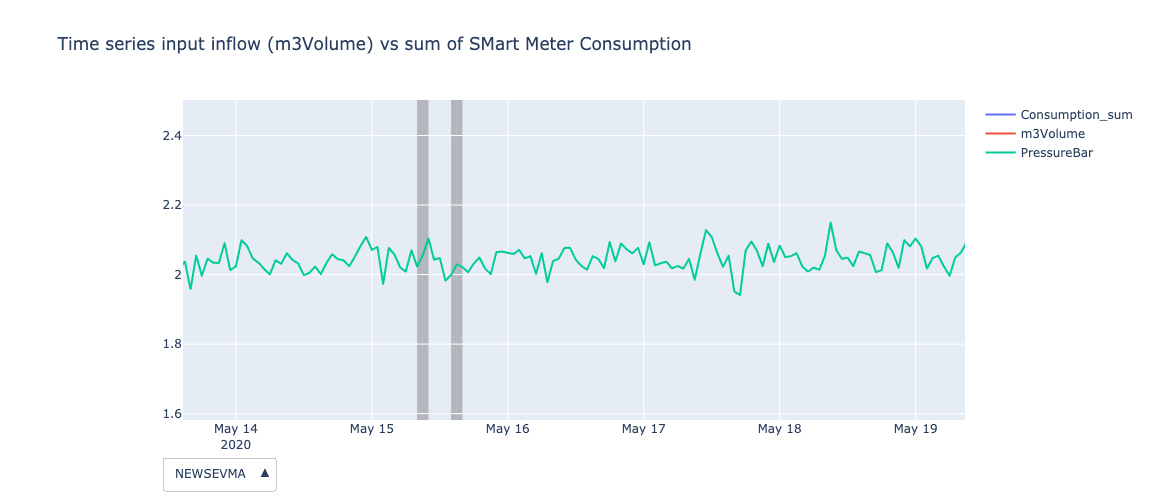

In [184]:
from waterhack.visualize import time_vs_y

df_plot = df_merge.tail(5000)
df_plot['Consumption_sum'] = df_plot['Consumption_sum']/1000

fig = time_vs_y(df = df_plot,
          time_col = 'DateTime',
         id_col_name = 'DMA',
         id_list =['NEWSEVMA', 'NORW21MA', 'NEWSTUMA', 'BURYRDMA', 'NORW37MA',
       'NEWCENMA', 'NORFIFMA', 'SWALSHMA', 'NORW18MA', 'NORCRDMA',
       'BLOFLDMA'],
         cols_descr = ['Consumption_sum','m3Volume','PressureBar'],
          y_col = 'is_leakage',
         title='Time series input inflow (m3Volume) vs sum of SMart Meter Consumption')

fig


In [183]:
fig.write_html("./data/figures/time_series_smartmeter_vs_inflow.html")